Prática de Realce e detecção de borda

Exercícios retirados de: http://homepages.inf.ed.ac.uk/rbf/HIPR2/featops.htm

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
np.set_printoptions(threshold=np.inf)

1. Aplique os filtros de realce Sobel e Roberts nas imagens abaixo. Mostre, para o caso do Sobel, uma imagem representando a derivada em x e outra imagem representando a derivada em y

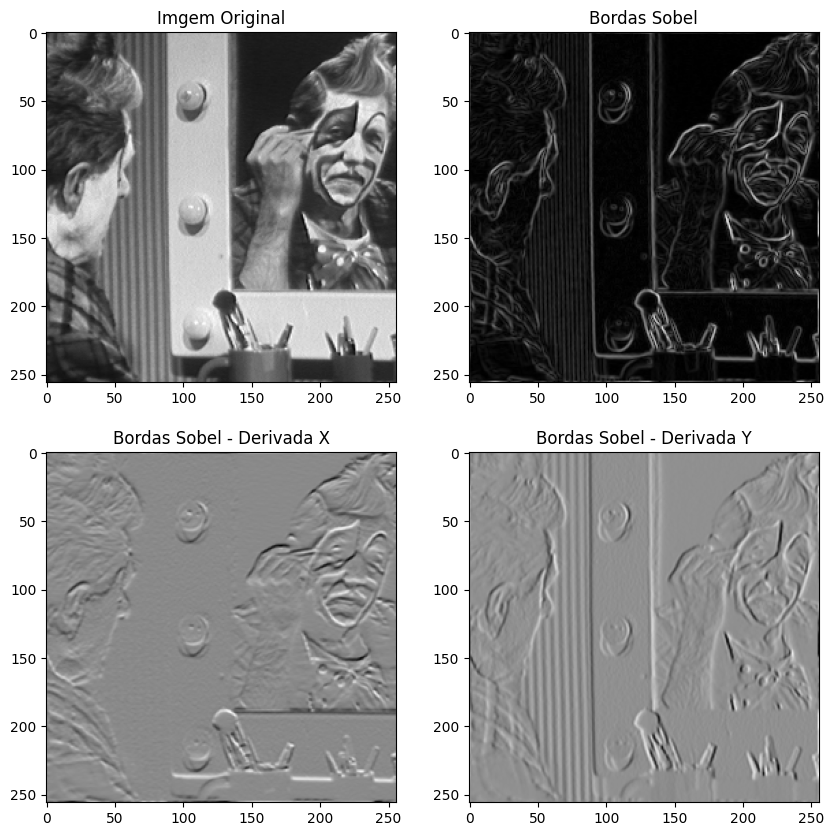

In [3]:
img = cv2.imread("cln1/cln1.png", cv2.IMREAD_GRAYSCALE)
maskY = np.array([  [-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
maskX = np.array([  [-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

sobelX = convolve2d(img, maskX, mode='same', boundary='wrap')
sobelY = convolve2d(img, maskY, mode='same', boundary='wrap')

sobelGradient = np.sqrt(sobelX**2 + sobelY**2)

def normalize (img):
    imgNormalized = ((img - img.min())/(img.max() - img.min()) * 255).astype(np.uint8)
    return imgNormalized

sobelImg = normalize(sobelGradient)
sobelImgX = normalize(sobelX)
sobelImgY = normalize(sobelY)

f, axarr = plt.subplots(2,2, figsize = (10,10))
axarr[0,0].imshow(img, cmap='gray', vmin=0, vmax=255)
axarr[0,0].title.set_text("Imgem Original")
axarr[0,1].imshow(sobelImg, cmap='gray', vmin=0, vmax=255)
axarr[0,1].title.set_text("Bordas Sobel")
axarr[1,0].imshow(sobelImgX, cmap='gray', vmin=0, vmax=255)
axarr[1,0].title.set_text("Bordas Sobel - Derivada X")
axarr[1,1].imshow(sobelImgY, cmap='gray', vmin=0, vmax=255)
axarr[1,1].title.set_text("Bordas Sobel - Derivada Y")

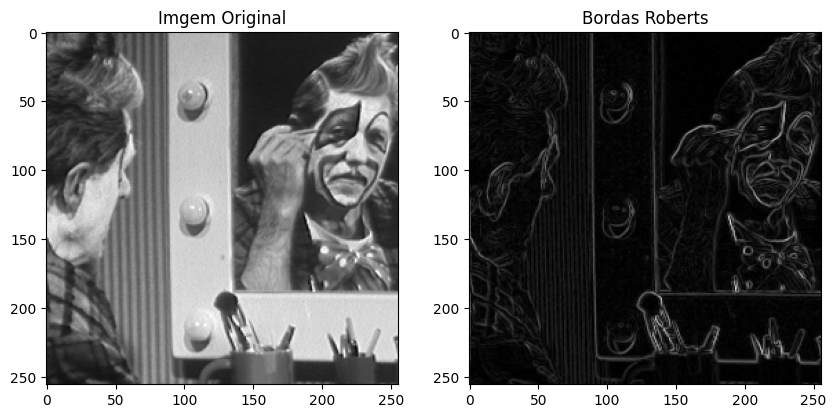

In [4]:
maskH1 = np.array([ [1, 0],
                    [0, -1]])
maskH2 = np.array([ [0, 1],
                    [-1, 0]])

robertsH1 = convolve2d(img, maskH1, mode='same', boundary='wrap')
robertsH2 = convolve2d(img, maskH2, mode='same', boundary='wrap')

robertsGradient = np.sqrt(robertsH1**2 + robertsH2**2)

robertsImg = normalize(robertsGradient)

f, (axarr1, axarr2)  = plt.subplots(1,2, figsize = (10,10))
axarr1.imshow(img, cmap='gray', vmin=0, vmax=255)
axarr1.title.set_text("Imgem Original")
axarr2.imshow(robertsImg, cmap='gray', vmin=0, vmax=255)
axarr2.title.set_text("Bordas Roberts")

2. Utilizando a imagem do exercício anterior, realce as bordas utilizando (a) Filtro Laplaciano. (b) Unsharp masking. (c) Highboost filtering (escolher um k). (d) K <1 para atenuar

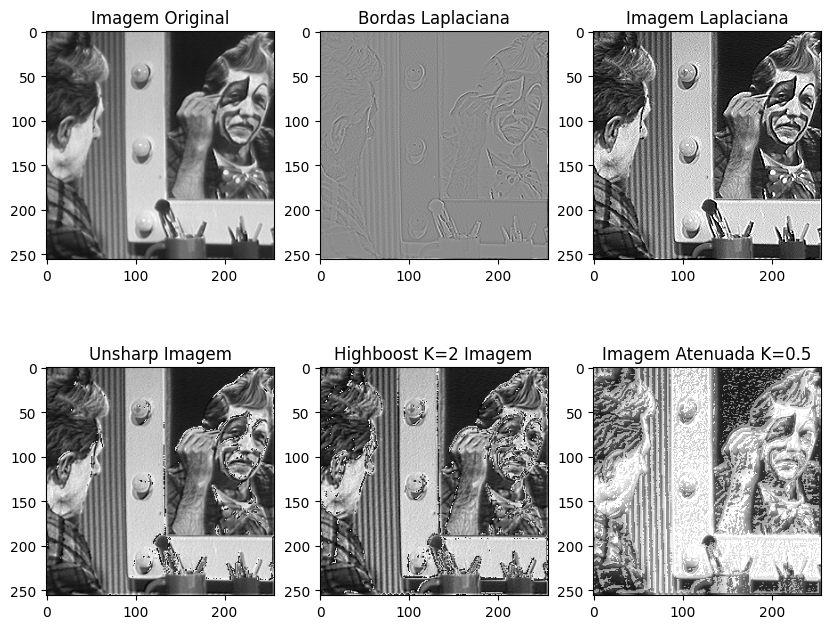

In [5]:
maskLaplac = np.array([ [0, 1, 0],
                        [1, -4, 1],
                        [0, 1, 0]])

def realceMask(img):
    mediaMask = 3
    imgY, imgX = img.shape
    imgMedia = np.zeros_like(img)

    for i in range(imgY):
        for j in range(imgX):
            mask = img[i:i+mediaMask, j:j+mediaMask]
            imgMedia[i,j] = np.sum(mask)/(mediaMask**2)
    
    realceMask = img - imgMedia
    return realceMask

laplacBorders = convolve2d(img, maskLaplac, mode='same', boundary='wrap')
laplacImgBorders = normalize(laplacBorders)
laplacImg = img-laplacBorders

unsharpImg = img+(realceMask(img))
highboostImg = img+(2*realceMask(img))
atenuadaImg = img+(0.5*realceMask(img))

f, ex2 = plt.subplots(2,3, figsize = (10,8))
ex2[0,0].imshow(img, cmap='gray', vmin=0, vmax=255)
ex2[0,0].title.set_text("Imagem Original")
ex2[0,1].imshow(laplacImgBorders, cmap='gray', vmin=0, vmax=255)
ex2[0,1].title.set_text("Bordas Laplaciana")
ex2[0,2].imshow(laplacImg, cmap='gray', vmin=0, vmax=255)
ex2[0,2].title.set_text("Imagem Laplaciana")
ex2[1,0].imshow(unsharpImg, cmap='gray', vmin=0, vmax=255)
ex2[1,0].title.set_text("Unsharp Imagem")
ex2[1,1].imshow(highboostImg, cmap='gray', vmin=0, vmax=255)
ex2[1,1].title.set_text("Highboost K=2 Imagem")
ex2[1,2].imshow(atenuadaImg, cmap='gray', vmin=0, vmax=255)
ex2[1,2].title.set_text("Imagem Atenuada K=0.5")

3. Aplique o operador Sobel imagem original abaixo e obtenha as outras imagens conforme descrição. We can see that the intensity of many pixels on the surface is as high as along the actual edges. One reason is that the output of many edge pixels is greater than the maximum pixel value and therefore they are `cut off' at 255. To avoid this overflow we scale the range image by a factor 0.25 prior to the edge detection and then normalize the output, as can be seen in (c)

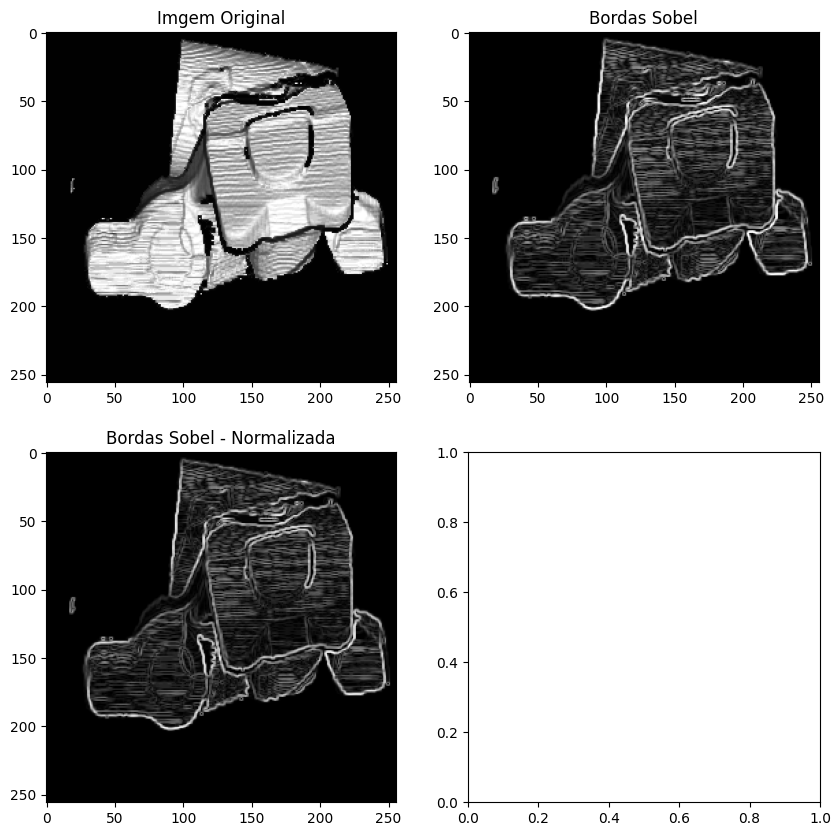

In [6]:
ren1 = cv2.imread("ren1/ren1.png", cv2.IMREAD_GRAYSCALE)

renSobel = ren1*0.25

sobelX = convolve2d(renSobel, maskX, mode='same', boundary='wrap')
sobelY = convolve2d(renSobel, maskY, mode='same', boundary='wrap')

ren1Gradient = np.sqrt(sobelX**2 + sobelY**2)
ren1Sobel = normalize(ren1Gradient)

f, ren1ax = plt.subplots(2,2, figsize = (10,10))
ren1ax[0,0].imshow(ren1, cmap='gray', vmin=0, vmax=255)
ren1ax[0,0].title.set_text("Imgem Original")
ren1ax[0,1].imshow(ren1Gradient, cmap='gray', vmin=0, vmax=255)
ren1ax[0,1].title.set_text("Bordas Sobel")
ren1ax[1,0].imshow(ren1Sobel, cmap='gray', vmin=0, vmax=255)
ren1ax[1,0].title.set_text("Bordas Sobel - Normalizada")

4. Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

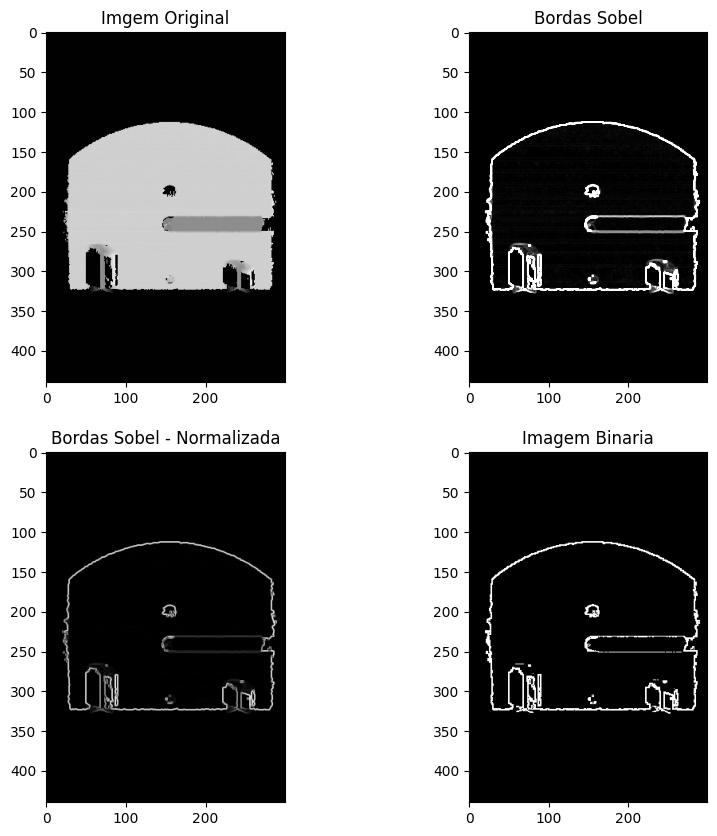

In [7]:
ufo2 = cv2.imread("ufo2/ufo2.png", cv2.IMREAD_GRAYSCALE)

sobelX = convolve2d(ufo2, maskX, mode='same', boundary='wrap')
sobelY = convolve2d(ufo2, maskY, mode='same', boundary='wrap')

ufo2Gradient = np.sqrt(sobelX**2 + sobelY**2)
ufo2Sobel = normalize(ufo2Gradient)
_, ufo2Binary = cv2.threshold(ufo2Gradient, 150, 255, cv2.THRESH_BINARY)

f, ufo2ax = plt.subplots(2,2, figsize = (10,10))
ufo2ax[0,0].imshow(ufo2, cmap='gray', vmin=0, vmax=255)
ufo2ax[0,0].title.set_text("Imgem Original")
ufo2ax[0,1].imshow(ufo2Gradient, cmap='gray', vmin=0, vmax=255)
ufo2ax[0,1].title.set_text("Bordas Sobel")
ufo2ax[1,0].imshow(ufo2Sobel, cmap='gray', vmin=0, vmax=255)
ufo2ax[1,0].title.set_text("Bordas Sobel - Normalizada")
ufo2ax[1,1].imshow(ufo2Binary, cmap='gray', vmin=0, vmax=255)
ufo2ax[1,1].title.set_text("Imagem Binaria")

5. Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

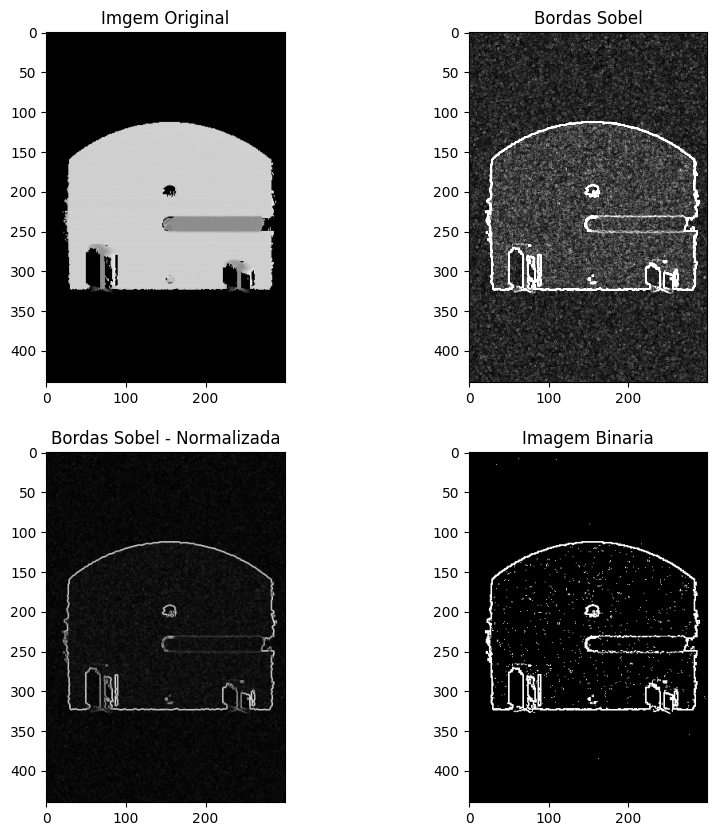

In [9]:
ufo2noi2 = cv2.imread("ufo2noi2/ufo2noi2.png", cv2.IMREAD_GRAYSCALE)

sobelX = convolve2d(ufo2noi2, maskX, mode='same', boundary='wrap')
sobelY = convolve2d(ufo2noi2, maskY, mode='same', boundary='wrap')

ufo2noi2Gradient = np.sqrt(sobelX**2 + sobelY**2)
ufo2noi2Sobel = normalize(ufo2noi2Gradient)
_, ufo2noi2Binary = cv2.threshold(ufo2noi2Gradient, 150, 255, cv2.THRESH_BINARY)

f, ufo2ax = plt.subplots(2,2, figsize = (10,10))
ufo2ax[0,0].imshow(ufo2noi2, cmap='gray', vmin=0, vmax=255)
ufo2ax[0,0].title.set_text("Imgem Original")
ufo2ax[0,1].imshow(ufo2noi2Gradient, cmap='gray', vmin=0, vmax=255)
ufo2ax[0,1].title.set_text("Bordas Sobel")
ufo2ax[1,0].imshow(ufo2noi2Sobel, cmap='gray', vmin=0, vmax=255)
ufo2ax[1,0].title.set_text("Bordas Sobel - Normalizada")
ufo2ax[1,1].imshow(ufo2noi2Binary, cmap='gray', vmin=0, vmax=255)
ufo2ax[1,1].title.set_text("Imagem Binaria")